In [5]:
from sys import version_info 
print(version_info[:3]) 

(3, 9, 13)


### Python version: (3, 9, 13)

In [1]:
import math

### Part 1. Calculate European option

#### Calculate cumulative distribution function of the standard normal distribution

In [2]:
def normal_cdf(mu, sigma, x):
    return (1/2)*(1 + math.erf((x - mu)/sigma*math.sqrt(2)))

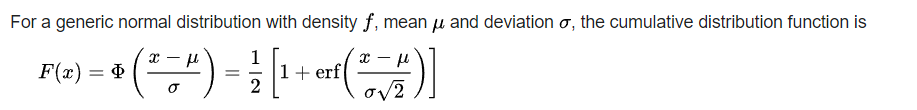

#### Calculate European option using Black Sholes formula

In [3]:
def bs_eur(ex_price, int_rate, cur_price, time, vol, option):
    d1 = (math.log(cur_price/ex_price)+(int_rate+(1/2)*vol**2)*time)/(vol*math.sqrt(time))
    d2 = (math.log(cur_price/ex_price)+(int_rate-(1/2)*vol**2)*time)/(vol*math.sqrt(time))
    call = cur_price*normal_cdf(0, 1, d1)-ex_price*math.exp(-int_rate*time)*normal_cdf(0, 1, d2)
    if option == "call":
        return call
    else:
        return call + ex_price*math.exp(-int_rate*time) - cur_price

#### For European call option Black Sholes formula:
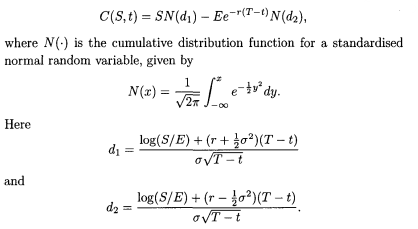

#### European put option we can calculate using Put-Call Parity formula:


#### Parameters of the function bs_eur, which calculate the price of European call and put options using the Black-Scholes formula:

- `ex_price` (E, exercise price) - the price at which an underlying security can be purchased or sold when trading a call or put option, respectively. This parameter takes only a number types, float or int, that value is more than 0;

- `int_rate` (r, interest rate) - the amount charged over and above the principal amount by the lender from the borrower. This parameter takes only the number type float that values from 0 to 1;

- `cur_price` (S, current price) – the underlying asset’s current price. It takes a number type float or int that is more than 0;

- `time` (T - t, time till maturity) - the difference between exercise time and time when we want to know the option’s price. It takes a number type float or int that is more than 0;

- `vol` (sigma, volatility) - a measure of the rate of fluctuations in the price of a security over time. It takes a number type float or int that is more than 0;

- `option` (option type, either 'call' or 'put') - a type of the European option: 'call' or 'put.’ It takes only one of the two words type string.


In [4]:
#Call this function using only keyword arguments
bs_eur(ex_price = 100, int_rate = 0.1, cur_price = 234, time = 7, vol = 0.1, option = 'call')

184.34146962085904

### Part 2. 

In [10]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [11]:
def root_bisection(f, a, b):
    if f(a) <= 10 ** -9 and f(a) >= -10 ** -9 or f(b) <= 10 ** -9 and f(b) >= -10 ** -9:
        return a or b
    if f(a)>0 and f(b)>0 or f(a)<0 and f(b)<0:
        return "Approximate root cannot be found"
    if min(f(a),f(b)) == f(a):
        x_neg = a
        x_pos = b
    else:
        x_neg = b
        x_pos = a
    while True:
        x_mid = (x_neg+x_pos)/2
        if f(x_mid) <= 10 ** -9 and f(x_mid) >= -10 ** -9:
            return x_mid
            break
        elif f(x_mid) < 0:
            x_neg = x_mid
        elif f(x_mid) > 0:
            x_pos = x_mid

In [12]:
#Checking the function root_bisection
def f(x):
    return 43*x**2 - 59*x - 47

a = root_bisection(f, -1, 0)
a
f(a)

b = root_bisection(f, 1, 2)
b
f(b)

-0.5644266275921836

-8.524807526555378e-10

1.936519650858827

3.121272129646968e-10

In [13]:
def root_bisection2(f, a, b, tol = 10 ** -9, max_bisect = float('inf'), strict = False):
    if tol < 0:
        return "Function does not work with negative tol"
    if abs(f(a)) <= tol or abs(f(b)) <= tol:
        return a or b
    if f(a)>0 and f(b)>0 or f(a)<0 and f(b)<0:
        return "Approximate root cannot be found"
    if min(f(a),f(b)) == f(a):
        x_neg = a
        x_pos = b
    else:
        x_neg = b
        x_pos = a
    if (x_neg+x_pos)/2 < max_bisect and (x_neg+x_pos)/2 != 0:
        while (x_neg+x_pos)/2 < max_bisect and (x_neg+x_pos)/2 != 0:
            x_mid = (x_neg+x_pos)/2
            if abs(f(x_mid)) <= tol:
                return x_mid
                break
            elif f(x_mid) < 0:
                x_neg = x_mid
            elif f(x_mid) > 0:
                x_pos = x_mid
    elif (x_neg+x_pos)/2 >= max_bisect or (x_neg+x_pos)/2 == 0:
        if strict == False:
            if abs(f(x_pos))>abs(f(x_neg)):
                return x_neg
            else:
                return x_pos
        if strict == True:
            return 'Approximate root cannot be found.'

In [14]:
#Testing the function root_bisection2
root_bisection2(math.cos, 1, 2, tol=1e-17, strict=True)

KeyboardInterrupt: 

In [15]:
import sys 

In [16]:
sys.float_info.epsilon

2.220446049250313e-16